In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/automobile-data-changed/Automobile_data.csv


In [7]:
# import pandas library
import pandas as pd
import numpy as np

### Reading Data

To read the CSV file, we use the `pandas.read_csv()` function. In the function, we provide the file path enclosed in quotation marks, enabling pandas to read the file into a DataFrame from that address. The file path can be either a URL or a local file address.

Since the data does not include headers, we add the argument `header=None` inside the `read_csv()` method to prevent pandas from automatically setting the first row as a header.


In [8]:
#  read the data 
df = pd.read_csv('/kaggle/input/automobile-data-changed/Automobile_data.csv')

In [9]:
df.shape

(205, 26)

In [10]:
# first 5 rows 
print("first 5 rows of the data") 
df.head(5)

first 5 rows of the data


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Adding Headers

Pandas automatically sets the header to integers starting from 0. To make the data more descriptive, we need to manually add headers. The necessary information for headers can be found at [UCI's Automobile Dataset](https://archive.ics.uci.edu/ml/datasets/Automobile).

To add headers, follow these steps:

1. Create a list called `headers` that includes all the column names in order.
2. Use `dataframe.columns = headers` to replace the default headers with the ones from the list.

In [6]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [7]:
# replace headers with above list
df.columns = headers
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8,115,5500,18,22,17450
6,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
7,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
9,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875


### Data Preprocessing

### Identifying and Handling Missing Values

#### Identifying Missing Values

In the car dataset, missing data is represented by the question mark "?". 

#### Converting "?" to NaN

We replace "?" with `NaN` (Not a Number), which is Python's default missing value marker, to facilitate computational speed and convenience. This is done using the `.replace(A, B, inplace=True)` function to replace A with B.

#### Dropping Missing Values

We can drop missing values in the "price" column as follows:


In [11]:
# Replace "?" with NaN to handle non-numeric values
df.replace("?", np.nan,  inplace=True)

##### missing data

In [12]:
missing_values_count = df.isna().sum()
print(missing_values_count)

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [13]:
missing_values_count[missing_values_count > 0]

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

#### Handling missing values

### Dealing with Missing Data

#### How to Handle Missing Data

1. **Drop Data**
   - a. Drop the entire row
   - b. Drop the entire column

2. **Replace Data**
   - a. Replace with the mean
   - b. Replace with the most frequent value
   - c. Replace based on other functions

#### Guidelines

- Drop entire columns only if most of the entries are empty. In our dataset, none of the columns are empty enough to warrant dropping entirely.
- We have some flexibility in choosing the method to replace missing data, though some methods may be more appropriate than others.

#### Methods Applied

**Replace with Mean:**
- "normalized-losses": 41 missing values, replace with mean
- "stroke": 4 missing values, replace with mean
- "bore": 4 missing values, replace with mean
- "horsepower": 2 missing values, replace with mean
- "peak-rpm": 2 missing values, replace with mean

**Replace with Frequency:**
- "num-of-doors": 2 missing values, replace with "four" (since 84% of sedans have four doors, making it the most frequent and likely value)

**Drop the Whole Row:**
- "price": 4 missing values, drop the entire row (since price is the target variable, any row missing this data is not useful for prediction)

In [14]:
# Replace missing values with the mean for specific columns
columns_to_replace_with_mean = ["normalized-losses", "stroke", "bore", "horsepower", "peak-rpm"]
for column in columns_to_replace_with_mean:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert column to float, coercing errors to NaN
    mean_value = df[column].mean()  # Calculate mean of the column
    df[column].fillna(mean_value, inplace=True)  # Replace NaNs with the mean


# Replace missing values with the most frequent value for "num-of-doors"
most_frequent_value = df["num-of-doors"].mode()[0]
df["num-of-doors"].fillna(most_frequent_value, inplace=True)

# Drop rows where "price" is missing
df.dropna(subset=["price"], inplace=True)

df.reset_index(inplace=True,drop=True)
# Print the DataFrame to verify the changes
print(df)


     symboling  normalized-losses         make fuel-type aspiration  \
0            3              122.0  alfa-romero       gas        std   
1            3              122.0  alfa-romero       gas        std   
2            1              122.0  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
196         -1               95.0        volvo       gas        std   
197         -1               95.0        volvo       gas      turbo   
198         -1               95.0        volvo       gas        std   
199         -1               95.0        volvo    diesel      turbo   
200         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88

/tmp/ipykernel_33/1666766755.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)  # Replace NaNs with the mean
/tmp/ipykernel_33/1666766755.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [15]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [16]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Correct Data Format

We are almost there! The final step in data cleaning is to ensure that all data is in the correct format (int, float, text, or other).

In pandas, you can use the following methods:

- `.dtype`: To check the data type of a column.
- `.astype()`: To change the data type of a column.

In [17]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we can see, some columns are not of the correct data type. Numerical variables should be of type 'float' or 'int', and categorical variables should be of type 'object'. For example, the 'bore' and 'stroke' variables are numerical values that describe the engines, so they should be of type 'float' or 'int'; however, they are currently shown as type 'object'. We need to convert the data types to the appropriate format for each column using the `.astype()` method.

In [18]:
# Convert specific columns to numeric, coercing errors to NaN
columns_to_convert = ["symboling", "normalized-losses", "bore", "stroke", "price", "peak-rpm"]
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')


In [19]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [20]:
# Fill NaN values with a placeholder (e.g., -1) for integer columns and convert to integer
df["symboling"] = pd.to_numeric(df["symboling"], errors='coerce').fillna(-1).astype('int64')
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"], errors='coerce').fillna(-1).astype('int32')
df["curb-weight"] = pd.to_numeric(df["curb-weight"], errors='coerce').fillna(-1).astype('int64')
df["engine-size"] = pd.to_numeric(df["engine-size"], errors='coerce').fillna(-1).astype('int64')

# Convert remaining columns to numeric, coercing errors to NaN
columns_to_convert = ["wheel-base", "length", "width", "height", "bore", "stroke", "compression-ratio", "peak-rpm", "price"]
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')


In [21]:
# Convert specific columns to numeric, coercing errors to NaN
columns_to_convert = [
    ("symboling", "int64"),
    ("normalized-losses", "int32"),
    ("wheel-base", "float64"),
    ("length", "float64"),
    ("width", "float64"),
    ("height", "float64"),
    ("curb-weight", "int64"),
    ("engine-size", "int64"),
    ("bore", "float64"),
    ("stroke", "float64"),
    ("compression-ratio", "float64"),
    ("peak-rpm", "float64"),
    ("price", "float64")
]

for column, dtype in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce').astype(dtype)


In [22]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

we finished data preprocessing, handling missing values and converting columns to correct type

### Data Processing

### Data Standardization

Data is often collected from various sources with different formats. Data Standardization is a process that involves transforming data into a common format, making meaningful comparisons possible. In particular, it can refer to normalizing data by subtracting the mean and dividing by the standard deviation.

#### What is Standardization?

Standardization is the process of transforming data into a common format to enable meaningful comparisons.

#### Example: Transforming mpg to L/100km

In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented in mpg (miles per gallon). If we are developing an application for a country that uses the L/100km standard, we need to transform these values.

The formula for the conversion is:
$ \text{L/100km} = \frac{235}{\text{mpg}} $

We can perform this transformation directly in Pandas.

In [23]:
# Convert the 'city-mpg' column to numeric values
df['city-mpg'] = pd.to_numeric(df['city-mpg'], errors='coerce')

# Convert 'city-mpg' to 'city-L/100km'
df['city-L/100km'] = 235 / df['city-mpg']


### Data Normalization

#### Why Normalize?

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include:
- Scaling the variable so the average is 0.
- Scaling the variable so the variance is 1.
- Scaling the variable so the values range from 0 to 1.

#### Example

To demonstrate normalization, let's scale the columns "length", "width", and "height".

**Target**: Normalize these variables so their values range from 0 to 1.

**Approach**: Replace the original value with $ \frac{\text{original value}}{\text{maximum value}} $.

In [24]:
# Replace (original value) with (original value) / (maximum value)
df['length'] = df['length'] / df['length'].max()
df['width'] = df['width'] / df['width'].max()


### Binning

#### Why Binning?

Binning is the process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

#### Example:

In our dataset, "horsepower" is a real-valued variable ranging from 48 to 288, with 57 unique values. If we only care about the price difference between cars with high horsepower, medium horsepower, and low horsepower, we can rearrange them into three ‘bins' to simplify analysis.

We will use the Pandas method `cut` to segment the 'horsepower' column into 3 bins.

In [25]:
#convert the data type
df["horsepower"] = df["horsepower"].astype(int, copy=True)


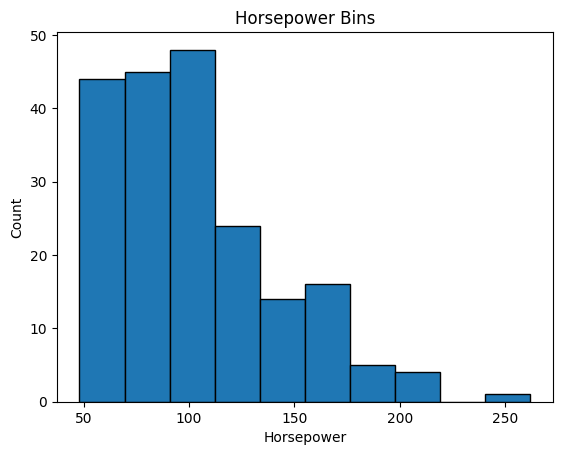

In [26]:
# Importing necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt

# Creating a histogram of the "horsepower" column
plt.hist(df["horsepower"], bins=10, edgecolor='black')

# Setting the x-axis label to "horsepower"
plt.xlabel("Horsepower")

# Setting the y-axis label to "count"
plt.ylabel("Count")

# Setting the title of the plot to "Horsepower Bins"
plt.title("Horsepower Bins")

# Displaying the plot
plt.show()

We want to create 3 bins of equal size, so we use NumPy's `linspace(start, stop, num)` function:

- **Start Value**: Set `start` to the minimum horsepower value: `min(df["horsepower"])`.
- **End Value**: Set `stop` to the maximum horsepower value: `max(df["horsepower"])`.
- **Number of Dividers**: To create 3 bins, we need 4 dividers, so set `num` to 4.

This generates an array with evenly spaced values, which will be used to determine the boundaries of the bins.

In [27]:
# Determine the bin edges and bin labels
bin_edges = np.linspace(df['horsepower'].min(), df['horsepower'].max(), num=4)  # num=4 generates 3 bins with 4 edges
bin_labels = ['Low', 'Medium', 'High']

# Use cut to segment the data into bins
df['horsepower_binned'] = pd.cut(df['horsepower'], bins=bin_edges, labels=bin_labels, include_lowest=True)


In [28]:
df[['horsepower','horsepower_binned']].head(20)

,horsepower,horsepower_binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [29]:
# see horsepower group counts
df["horsepower_binned"].value_counts()

horsepower_binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

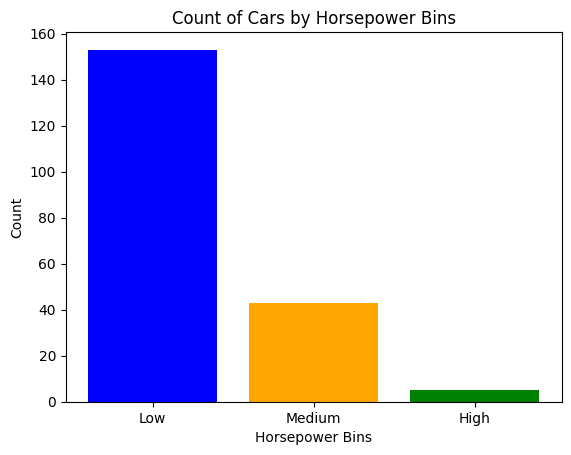

In [30]:
# Calculate the counts of each bin
bin_counts = df['horsepower_binned'].value_counts().reindex(bin_labels)

# Plot the bar plot using plt.bar
plt.bar(bin_counts.index, bin_counts.values, color=['blue', 'orange', 'green'])

# Set plot labels and title
plt.xlabel('Horsepower Bins')
plt.ylabel('Count')
plt.title('Count of Cars by Horsepower Bins')

# Show the plot
plt.show()


we have created 3 categoreis form 57

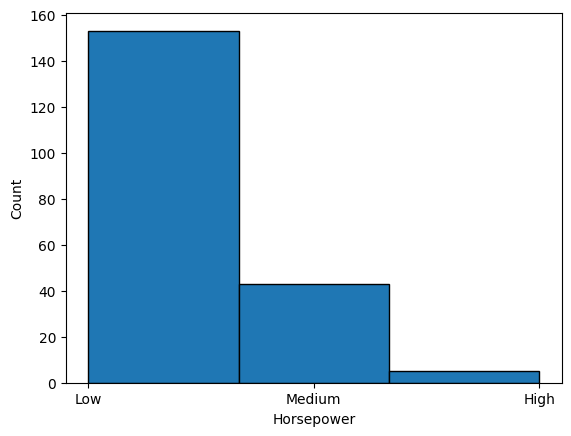

In [31]:
plt.hist(df["horsepower_binned"],bins=3,edgecolor='black')
plt.xlabel("Horsepower")
plt.ylabel("Count")
plt.show()

### Indicator Variable (or Dummy Variable)

#### What is an Indicator Variable?

An indicator variable, also known as a dummy variable, is a numerical variable used to represent categories. They are called "dummies" because the numbers assigned do not have any inherent meaning.

#### Why Use Indicator Variables?

Indicator variables allow us to include categorical data in regression analysis. Regression models require numerical input, so we convert categorical variables into numerical form.



In [32]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'horsepower_binned'],
      dtype='object')

In [33]:
# Convert 'fuel-type' to indicator variables and rename columns in one step
df = pd.get_dummies(df,columns=["fuel-type"])

In [34]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower_binned', 'fuel-type_diesel',
       'fuel-type_gas'],
      dtype='object')

In [35]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower_binned,fuel-type_diesel,fuel-type_gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,13495.0,11.190476,Low,False,True
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,16500.0,11.190476,Low,False,True
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,26,16500.0,12.368421,Medium,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,30,13950.0,9.791667,Low,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,22,17450.0,13.055556,Low,False,True


In [37]:
# lets save the clean data
df.to_csv('clean_auto.csv')

In [38]:
#  read the data 
df = pd.read_csv('/kaggle/working/clean_auto.csv')

Let's analize individual features

### Continuous Numerical Variables

Continuous numerical variables can take any value within a range and can be of type "int64" or "float64". Scatterplots with fitted lines are ideal for visualizing these variables.

To understand the linear relationship between a variable and the price, use `regplot`, which shows a scatterplot and a fitted regression line.



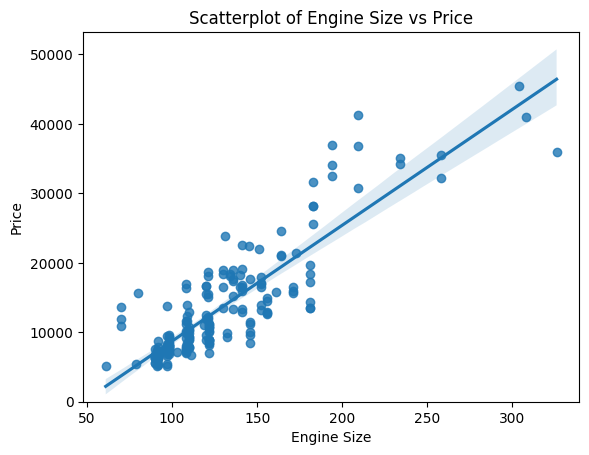

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot of Engine Size vs Price with regression line
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)  # Set y-axis to start at 0
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Scatterplot of Engine Size vs Price")
plt.show()


As the engine size increases, the price also increases, indicating a positive direct correlation between these two variables. Engine size appears to be a strong predictor of price, as the regression line is almost perfectly diagonal.

The correlation between 'engine-size' and 'price' is approximately 0.87.

In [40]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

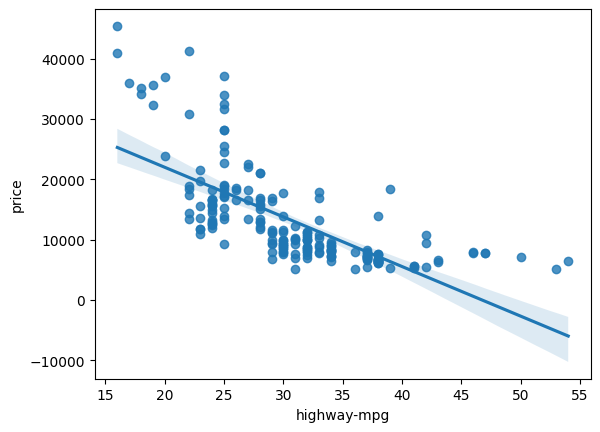

In [41]:
sns.regplot(x="highway-mpg", y="price", data=df)

As highway-mpg increases, the price decreases, indicating an inverse or negative relationship between these two variables. Highway mpg could potentially predict price.

The correlation between 'highway-mpg' and 'price' is approximately -0.704.

In [42]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

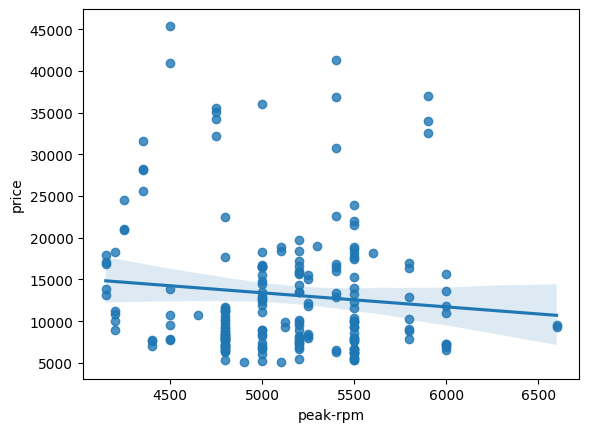

In [43]:
sns.regplot(x="peak-rpm", y="price", data=df)

Peak rpm does not appear to be a good predictor of price because the regression line is nearly horizontal. Additionally, the data points are widely scattered and far from the fitted line, indicating high variability. Therefore, it is not a reliable variable.

The correlation between 'peak-rpm' and 'price' is approximately -0.101616.

In [44]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


### Categorical Variables

Categorical variables describe a characteristic of a data unit and are selected from a small group of categories. These variables can be of type "object" or "int64". Boxplots are an effective way to visualize categorical variables.

<Axes: xlabel='body-style', ylabel='price'>

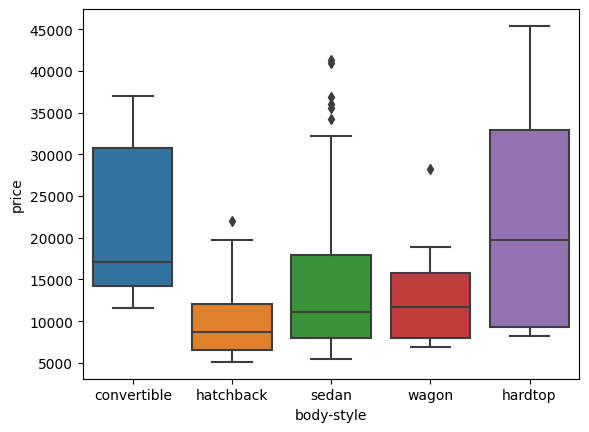

In [45]:
sns.boxplot(x="body-style", y="price", data=df)

### Relationship Between "Body-Style" and "Price"

Let's examine the relationship between "body-style" and "price".

The distributions of price across different body-style categories significantly overlap, indicating that body-style is not a good predictor of price.

Next, let's examine the relationship between "engine-location" and "price".

<Axes: xlabel='engine-location', ylabel='price'>

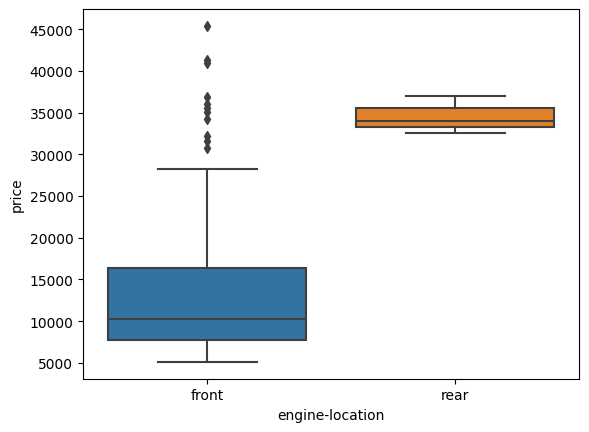

In [46]:
sns.boxplot(x="engine-location", y="price", data=df)

The price distribution between the two engine-location categories, front and rear, is distinct enough to consider engine-location as a potentially good predictor of price.

<Axes: xlabel='drive-wheels', ylabel='price'>

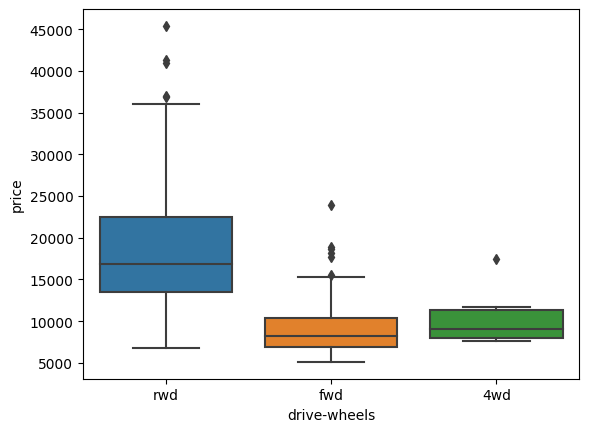

In [47]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

Here we see that the price distribution differs between the various drive-wheel categories, indicating that drive-wheels could potentially be a predictor of price.

In [48]:
# Grouping results and calculating the mean price
grouped_test1 = df.groupby(['drive-wheels', 'body-style'], as_index=False)['price'].mean()

# Display the result
print(grouped_test1)


   drive-wheels   body-style         price
0           4wd    hatchback   7603.000000
1           4wd        sedan  12647.333333
2           4wd        wagon   9095.750000
3           fwd  convertible  11595.000000
4           fwd      hardtop   8249.000000
5           fwd    hatchback   8396.387755
6           fwd        sedan   9811.800000
7           fwd        wagon   9997.333333
8           rwd  convertible  23949.600000
9           rwd      hardtop  24202.714286
10          rwd    hatchback  14337.777778
11          rwd        sedan  21711.833333
12          rwd        wagon  16994.222222


In [49]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [50]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

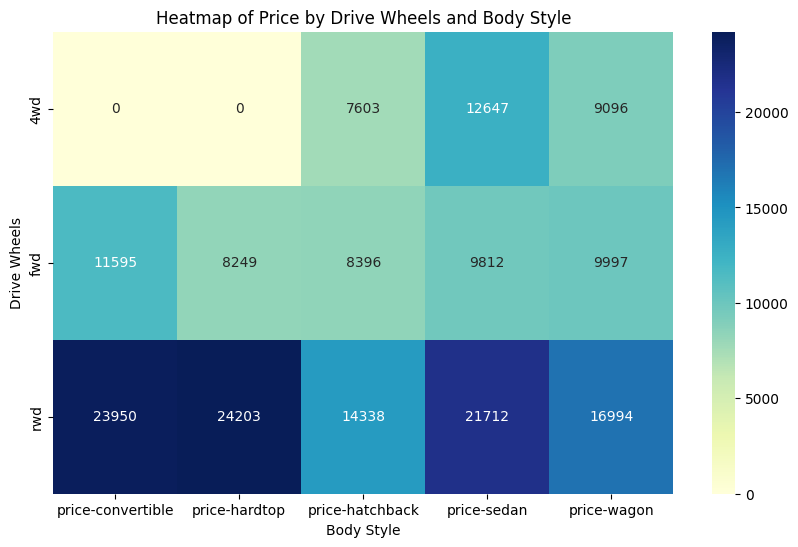

In [51]:
# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Heatmap of Price by Drive Wheels and Body Style')
plt.xlabel('Body Style')
plt.ylabel('Drive Wheels')
plt.show()

The heatmap plots the target variable (price) with colors proportional to its value, using 'drive-wheel' on the vertical axis and 'body-style' on the horizontal axis. This visualization helps us understand the relationship between price, drive-wheel, and body-style.


### Correlation and Causation

**Correlation**: A measure of the extent to which two variables are interdependent.

**Causation**: The relationship between cause and effect between two variables.

It is crucial to understand that correlation does not imply causation. Determining correlation is simpler than determining causation, which often requires independent experimentation.

### Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables, X and Y. The coefficient ranges from -1 to 1:

- **1**: Total positive linear correlation.
- **0**: No linear correlation; the variables likely do not affect each other.
- **-1**: Total negative linear correlation.

The Pearson Correlation is the default method for the `corr` function in pandas. It can be used to calculate the correlation for variables of type 'int64' or 'float64'.

### Significance of Correlation

Sometimes, we want to determine the significance of a correlation estimate.

#### P-value:

The P-value indicates the probability that the correlation between two variables is statistically significant. Typically, a significance level of 0.05 is chosen, meaning we are 95% confident that the correlation is significant.

#### P-value Interpretation:

- **p-value < 0.001**: Strong evidence that the correlation is significant.
- **p-value < 0.05**: Moderate evidence that the correlation is significant.
- **p-value < 0.1**: Weak evidence that the correlation is significant.
- **p-value > 0.1**: No evidence that the correlation is significant.

We can calculate the P-value using the `stats` module from the `scipy` library.

In [53]:
from scipy import stats

In [54]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef, "with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.584641822265508 with a P-value of P = 8.076488270732885e-20



- **Pearson Correlation Coefficient**: Indicates the strength and direction of the linear relationship between the two variables.
- **P-value**: Indicates the statistical significance of the correlation. A small P-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, suggesting the correlation is significant.

In [55]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483639  with a P-value of P =  8.01647746615924e-30


Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

In [56]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238893965e-53


Since the p-value is 
 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

In [57]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 


The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198793e-64


Since the p-value is 
 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

In [58]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935315e-17


Since the p-value is 
 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

In [59]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.3211320655675098e-29


Since the p-value is 
 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.

In [60]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.749547114447557e-31


Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

### ANOVA: Analysis of Variance

ANOVA (Analysis of Variance) tests if there are significant differences between the means of two or more groups. It provides two key parameters:

1. **F-test score**: 
   - Measures the deviation of group means from the overall mean.
   - A larger F-test score indicates a greater difference between group means.

2. **P-value**:
   - Indicates the statistical significance of the F-test score.
   - A smaller P-value suggests the differences between group means are statistically significant.

If the price variable is strongly correlated with the variable being analyzed, ANOVA will return a high F-test score and a low P-value.

In [66]:
# Grouping the data by 'drive-wheels' and applying ANOVA
grouped_test2 = df[['drive-wheels', 'price']].groupby('drive-wheels')

# Extracting price data for each group
fwd_prices = grouped_test2.get_group('fwd')['price']
rwd_prices = grouped_test2.get_group('rwd')['price']
awd_prices = grouped_test2.get_group('4wd')['price']

# Performing ANOVA
f_val, p_val = stats.f_oneway(fwd_prices, rwd_prices, awd_prices)

# Displaying the results
print("ANOVA results: F =", f_val, ", P =", p_val)

ANOVA results: F = 67.95406500780399 , P = 3.3945443577151245e-23


We now have a better understanding of our data and the key variables to consider when predicting car prices. We have identified the following important variables:

### Continuous Numerical Variables:
- Length
- Width
- Curb-weight
- Engine-size
- Horsepower
- City-mpg
- Highway-mpg
- Wheel-base
- Bore

### Categorical Variables:
- Drive-wheels

As we move into building machine learning models, using variables that significantly impact our target variable will enhance our model's predictive performance.

### Model Development

In this module, we aim to answer the following questions:

- Is the dealer offering a fair value for my trade-in?
- Am I setting a fair price for my car?

### Importance of Model Development

In data analytics, model development is crucial for predicting future values based on existing data. Models help us understand the relationships between different variables and how these variables influence the outcome.

### Linear Regression and Multiple Linear Regression

#### Linear Regression

Linear regression is a fundamental method for understanding the relationship between two variables:

1. **Predictor/Independent Variable (X)**: The variable we use to make predictions.
2. **Response/Dependent Variable (Y)**: The variable we want to predict.

The outcome of linear regression is a linear function that predicts the dependent variable (Y) based on the independent variable (X).

**Linear Function:**

$ Y = a + bX $

- **a**: The intercept of the regression line, representing the value of Y when X is 0.
- **b**: The slope of the regression line, indicating the change in Y when X increases by 1 unit.

### Why Use Linear Regression?

Linear regression helps us quantify the relationship between variables, allowing us to make predictions and understand how changes in the independent variable affect the dependent variable.

### Moving Forward

As we progress to building machine learning models, it’s essential to include variables that significantly impact our target variable. This approach will enhance the model's accuracy and predictive performance.

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lm = LinearRegression()
lm

LinearRegression()

### How Could Highway-mpg Help Us Predict Car Price?

To understand how highway-mpg can help predict car price, we will use simple linear regression. In this example, "highway-mpg" will be the predictor variable, and "price" will be the response variable. This allows us to create a linear function that models the relationship between highway-mpg and car price.

In [75]:
X = df[['highway-mpg']]
Y = df['price']

# fit
lm.fit(X,Y)

# predict
Yhat=lm.predict(X)
Yhat[0:5]  

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [77]:
# intercept value 
lm.intercept_

38423.3058581574

In [78]:
# slope value 
lm.coef_

array([-821.73337832])

### What is the Final Estimated Linear Model?

As we saw above, the final linear model has the following structure:

$ \text{price} = a + b \times \text{highway-mpg} $

Plugging in the actual values, we get:

$ \text{price} = 38423.31 - 821.73 \times \text{highway-mpg} $

### Multiple Linear Regression

When we want to predict car price using more than one variable, we use Multiple Linear Regression. This method explains the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most real-world regression models involve multiple predictors.

### Structure of Multiple Linear Regression

The general form of the equation is:

$$ \text{price} = a + b_1 \times \text{horsepower} + b_2 \times \text{curb-weight} + b_3 \times \text{engine-size} + b_4 \times \text{highway-mpg} $$

Where:
- **a**: Intercept
- **b1, b2, b3, b4**: Coefficients for each predictor variable

### Good Predictors of Car Price

From our previous analysis, we know that good predictors of car price include:
- Horsepower
- Curb-weight
- Engine-size
- Highway-mpg

### Developing the Model

Let's develop a Multiple Linear Regression model using these variables as predictors to estimate the car price.

In [80]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
# fit the model
lm.fit(X, df['price'])

LinearRegression()

In [83]:
# intercept
lm.intercept_


-15811.863767729232

In [84]:
# coefficients
lm.coef_

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

### What is the Final Estimated Linear Model?

As we discussed, the final linear model should have the following structure:

### Linear Function for This Example

The estimated linear function we get is:

$$ \text{Price} = -15678.74 + 52.66 \times \text{horsepower} + 4.70 \times \text{curb-weight} + 81.96 \times \text{engine-size} + 33.58 \times \text{highway-mpg} $$

### Model Evaluation Using Visualization

After developing models, we need to evaluate them to choose the best one. One effective method for evaluation is visualization.

### Regression Plot

For simple linear regression, regression plots are an excellent way to visualize the model fit. A regression plot combines scatter data points and the fitted linear regression line. This helps us estimate the relationship between the variables, understand the strength of the correlation, and determine the direction (positive or negative correlation).

Let's visualize highway-mpg as a potential predictor of price:

(0.0, 48183.55757434251)

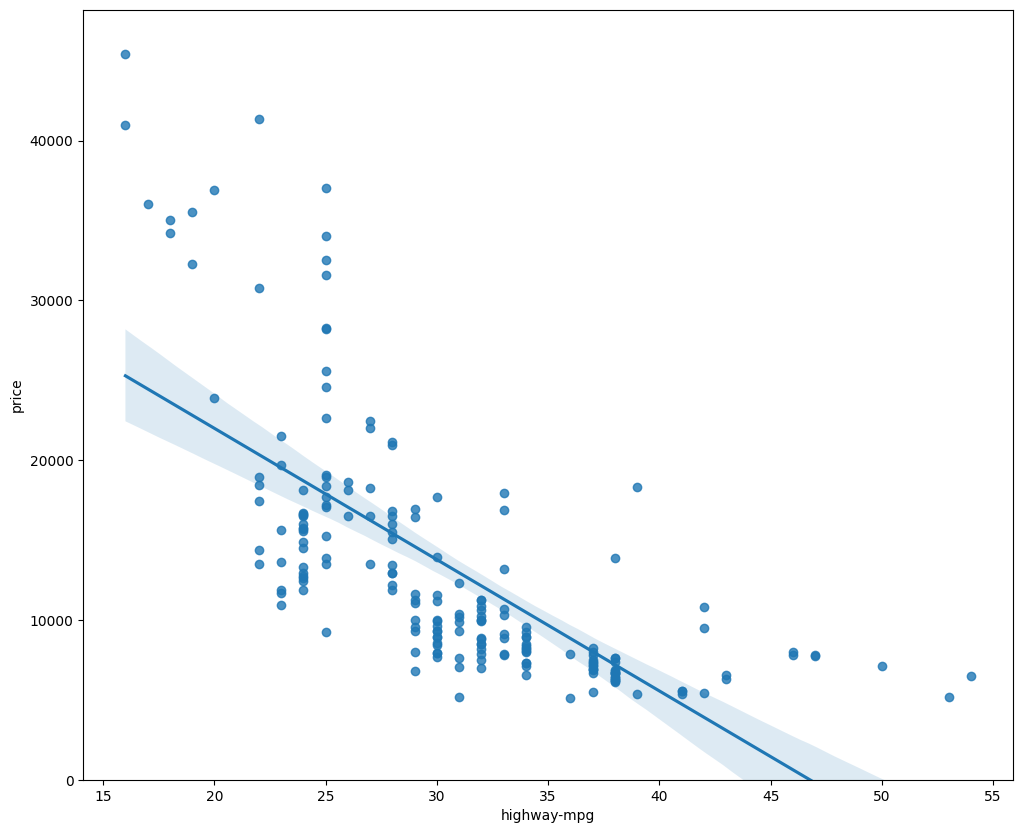

In [85]:
# Let's visualize highway-mpg as potential predictor variable of price:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated with highway-mpg, as indicated by the negative regression slope. When examining a regression plot, it's important to observe how scattered the data points are around the regression line. This indicates the variance of the data and helps determine if a linear model is appropriate. If the data points are too far from the line, a linear model may not be the best fit for this data. Let's compare this plot to the regression plot of "peak-rpm".

(0.0, 47414.1)

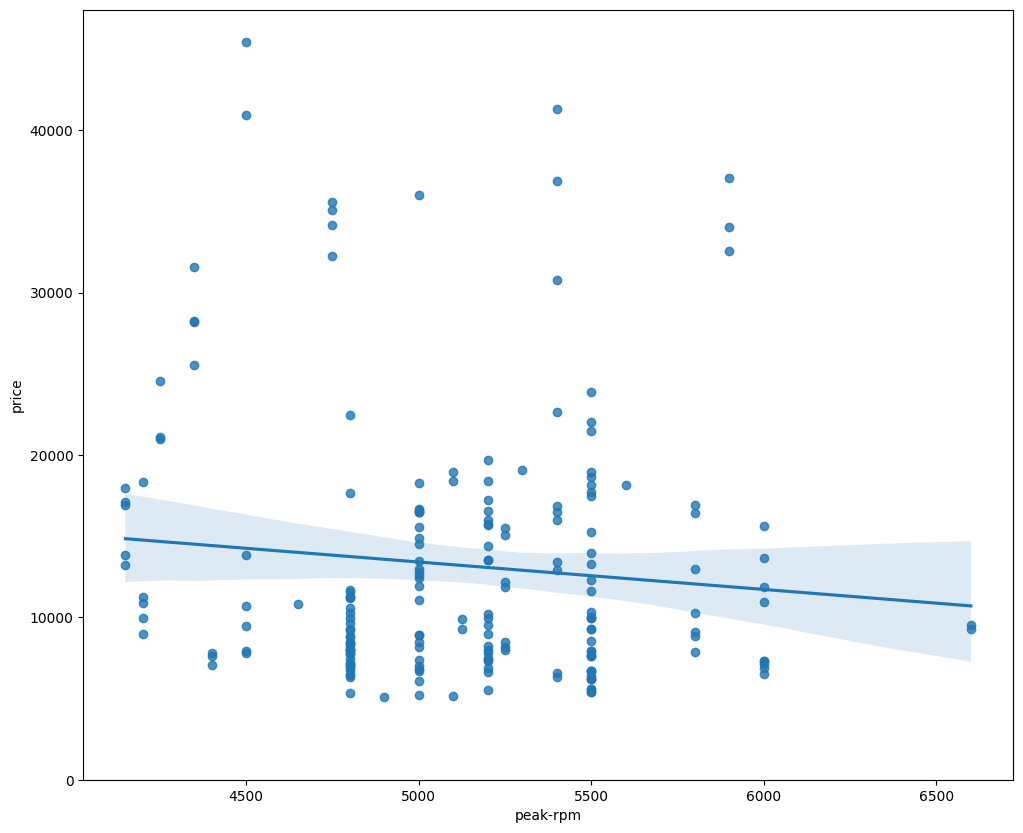

In [86]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

### Comparing Regression Plots

When comparing the regression plots of "peak-rpm" and "highway-mpg," we observe that the points for "highway-mpg" are much closer to the regression line and generally decrease. In contrast, the points for "peak-rpm" are more spread out around the predicted line, making it harder to determine a clear trend.

### Residual Plot

A residual plot is a useful tool for visualizing the variance of the data.

#### What is a Residual?

A residual is the difference between the observed value (y) and the predicted value (Yhat). In a regression plot, the residual is the distance from the data point to the fitted regression line.

#### What is a Residual Plot?

A residual plot is a graph that displays the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

#### Interpreting a Residual Plot

When examining a residual plot, we focus on the spread of the residuals:

- If the residuals are randomly spread around the x-axis, it indicates that a linear model is appropriate for the data. This randomness suggests that the variance is constant, validating the linear model's fit to the data.

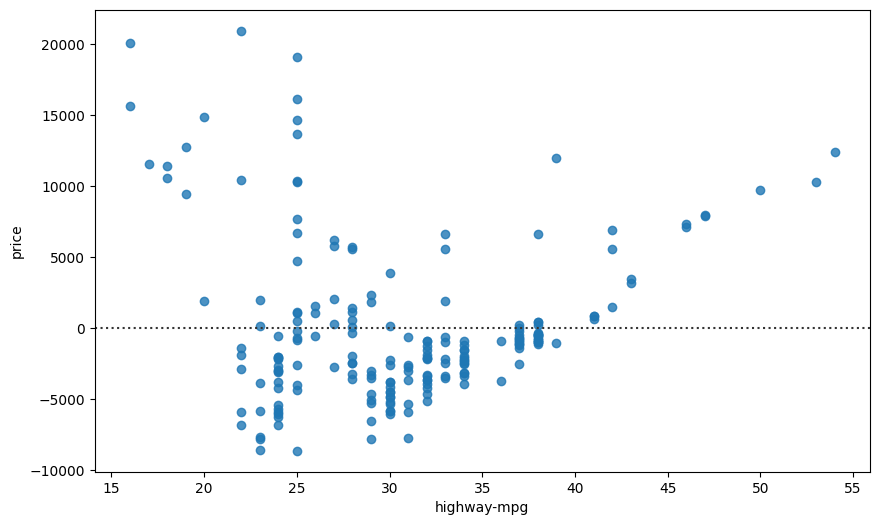

In [88]:
# Set the figure size
plt.figure(figsize=(10, 6)) 
# Create the residual plot
sns.residplot(x=df['highway-mpg'], y=df['price'])

# Display the plot
plt.show()

### What is This Plot Telling Us?

This residual plot shows that the residuals are not randomly spread around the x-axis. This suggests that a non-linear model might be more appropriate for this data.

### Multiple Linear Regression

Visualizing a model for Multiple Linear Regression is more complex because we can't use simple regression or residual plots.

### Visualizing Model Fit

One way to assess the fit of the model is by comparing the distribution of the fitted values (predictions) to the distribution of the actual values. This can be done using a distribution plot.

### Making Predictions

First, let's make predictions with the model.

In [89]:
Y_hat = lm.predict(X)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


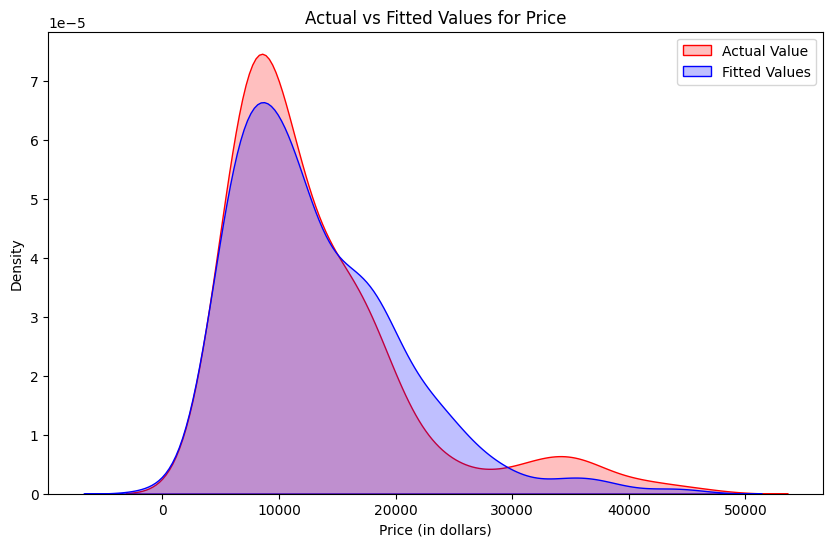

In [90]:
# Set the figure size
plt.figure(figsize=(10, 6))  # Example values for width and height

# Plot the actual values
sns.kdeplot(df['price'], color="r", label="Actual Value", fill=True)

# Plot the fitted values
sns.kdeplot(Y_hat, color="b", label="Fitted Values", fill=True)

# Set the title and labels
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Density')

# Show the plot
plt.legend()
plt.show()

We can see that the fitted values are reasonably close to the actual values, as the two distributions overlap somewhat. However, there is definitely room for improvement.

### Part 3: Polynomial Regression and Pipelines

Polynomial regression is a special case of linear regression that allows us to model non-linear relationships by including higher-order terms of the predictor variables.

### Types of Polynomial Regression

- **Quadratic**: 2nd order polynomial
- **Cubic**: 3rd order polynomial
- **Higher Order**: Polynomials of degree 4 or higher

### Why Use Polynomial Regression?

Previously, we saw that a linear model did not fit the data well when using highway-mpg as the predictor variable. By fitting a polynomial model, we can capture the non-linear relationship between highway-mpg and car price more effectively.

### Plotting Polynomial Regression

We will use a function to plot the data and the polynomial regression model to visualize the fit.


In [97]:
def PlotPolly(model, independent_variable, dependent_variable, name):
    # Generate a range of values for the independent variable
    x_new = np.linspace(independent_variable.min(), independent_variable.max(), 100)
    
    # Predict the dependent variable using the model
    y_new = model(x_new)
    
    # Plot the original data points
    plt.plot(independent_variable, dependent_variable, '.', label='Data Points')
    
    # Plot the polynomial fit
    plt.plot(x_new, y_new, '-', label='Polynomial Fit')
    
    # Set the title and labels
    plt.title(f'Polynomial Fit with Matplotlib for Price ~ {name}')
    plt.xlabel(name)
    plt.ylabel('Price of Cars')
    
    # Set the background color
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()
    plt.close()


        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


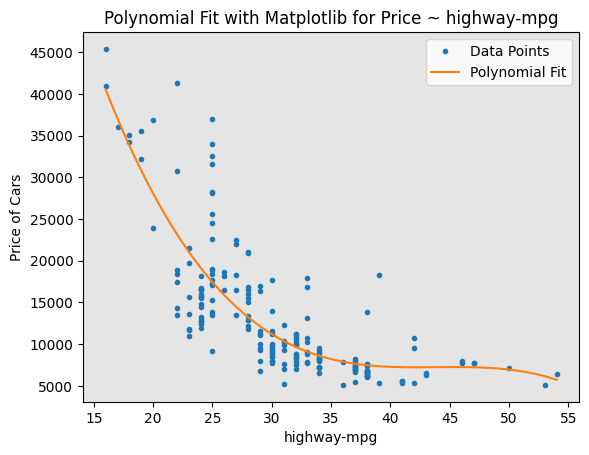

In [98]:

x = df['highway-mpg']
y = df['price']

# Fit a polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)

# Print the polynomial coefficients
print(p)

# Plot the polynomial fit
PlotPolly(p, x, y, 'highway-mpg')

### Evaluating Polynomial Model Performance

From the plot, we can see that the polynomial model performs better than the linear model. This is because the polynomial function fits more of the data points accurately.

### Analytical Expression for Multivariate Polynomial Functions

The analytical expression for a multivariate polynomial function becomes complex. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:

$$ \text{price} = b_0 + b_1 \times \text{feature1} + b_2 \times \text{feature2} + b_3 \times \text{feature1}^2 + b_4 \times \text{feature1} \times \text{feature2} + b_5 \times \text{feature2}^2 $$



In [99]:
from sklearn.preprocessing import PolynomialFeatures

In [100]:
# create a PolynomialFeatures of degree 2:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [101]:
Z_pr=pr.fit_transform(X)

In [102]:
X.shape

(201, 4)

In [103]:
Z_pr.shape

(201, 15)

### Pipeline

Data Pipelines simplify the steps involved in processing data. We use the `Pipeline` module to create a pipeline and include `StandardScaler` as a step in our pipeline.

In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by constructing a list of tuples, each containing the name of the model or estimator and its corresponding constructor.

In [105]:
pipeline_steps = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]


In [106]:
pipe=Pipeline(pipeline_steps)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [108]:
pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [109]:
ypipe=pipe.predict(X)
ypipe[0:4]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

### Measures for In-Sample Evaluation

When evaluating our models, we want both visual and quantitative measures to determine model accuracy. Two important statistical measures for model accuracy are:

- **R-squared (R²)**
- **Mean Squared Error (MSE)**

### R-squared (R²)

R-squared, also known as the coefficient of determination, measures how close the data is to the fitted regression line. It represents the percentage of variation in the response variable (y) that is explained by the linear model.

### Mean Squared Error (MSE)

Mean Squared Error measures the average of the squares of errors, i.e., the difference between the actual value (y) and the estimated value (ŷ).

### Model 1: Simple Linear Regression

Let's calculate the R².

In [113]:
x = df["highway-mpg"].values.reshape(-1, 1)  # Reshape to 2D array
y = df["price"].values 
#highway_mpg_fit
lm.fit(x, y)
# Find the R^2
print('The R-square is: ', lm.score(x, y))

The R-square is:  0.4965911884339176


### R-squared

The R-squared value is 0.4966. This means that approximately 49.66% of the variation in the price is explained by this simple linear model using "horsepower_fit".



In [115]:
Yhat=lm.predict(x)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [116]:
from sklearn.metrics import mean_squared_error

In [117]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


#### Mulitple Linear Regression

In [120]:
# fit the model 
lm.fit(X, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(X, df['price']))

The R-square is:  0.8093732522175299


~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [122]:
Y_predict_multifit = lm.predict(X)
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11979300.34981888


#### Polynomial

In [123]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


~ 67.419 % of the variation of price is explained by this polynomial fit

In [124]:
mean_squared_error(df['price'], p(x))

20474146.426361218

### Decision Making: Determining a Good Model Fit

Now that we have visualized the different models and generated the R-squared and MSE values, how do we determine a good model fit?

### What is a Good R-squared Value?

When comparing models, the one with the higher R-squared value is a better fit for the data.

### What is a Good MSE?

When comparing models, the one with the smallest MSE value is a better fit for the data.

### Model Comparisons

#### Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price

- **R-squared**: 0.4966
- **MSE**: 3.16 x 10^7

#### Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price

- **R-squared**: 0.8090
- **MSE**: 1.2 x 10^7

#### Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price

- **R-squared**: 0.6742
- **MSE**: 2.05 x 10^7

### SLR vs. MLR

- **MSE**: The MSE of SLR is 3.16 x 10^7, while MLR has an MSE of 1.2 x 10^7. The MSE of MLR is much smaller.
- **R-squared**: The R-squared for SLR (~0.497) is much smaller compared to MLR (~0.809).

The combination of the lower MSE and higher R-squared value indicates that MLR is a better fit than SLR.

### SLR vs. Polynomial Fit

- **MSE**: The Polynomial Fit has a lower MSE compared to SLR.
- **R-squared**: The Polynomial Fit has a higher R-squared compared to SLR.

Thus, the Polynomial Fit is a better model than SLR for predicting price using Highway-mpg as a predictor variable.

### MLR vs. Polynomial Fit

- **MSE**: The MSE for MLR is smaller than for the Polynomial Fit.
- **R-squared**: The R-squared for MLR is much larger than for the Polynomial Fit.

### Conclusion

Comparing these three models, we conclude that the MLR model is the best for predicting price from our dataset. This result makes sense since we have 27 variables in total, and more than one of those variables are potential predictors of the final car price.